In [26]:
# polynomial regression using normal equation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/deg6.xlsx')
degree = 6

x_train = data['x'].values
y_train = data['y'].values

In [27]:
# create input matrix
X = np.ones((len(x_train), degree + 1))
for i in range(1, degree + 1):
    X[:, i] = x_train ** i

X.shape

(36, 7)

In [28]:
# use normal equation to solve for theta
theta = np.linalg.inv(X.T @ X) @ X.T @ y_train

# print equation
print('y = %.2f' % theta[0], end='')
for i in range(1, len(theta)):
    print(' + %.2fx^%d' % (theta[i], i), end='')

y = 160.18 + -1000.53x^1 + 2435.16x^2 + -2949.97x^3 + 1892.57x^4 + -615.05x^5 + 79.69x^6

In [29]:
# solve for theta with regularization
I = np.identity(degree + 1)
I[0, 0] = 0
lambda_ = 0.000001

theta_reg = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y_train

# print equation
print('y = %.2f' % theta_reg[0], end='')
for i in range(1, len(theta_reg)):
    print(' + %.2fx^%d' % (theta_reg[i], i), end='')

y = 85.82 + -534.44x^1 + 1305.97x^2 + -1586.42x^3 + 1019.79x^4 + -332.08x^5 + 43.14x^6

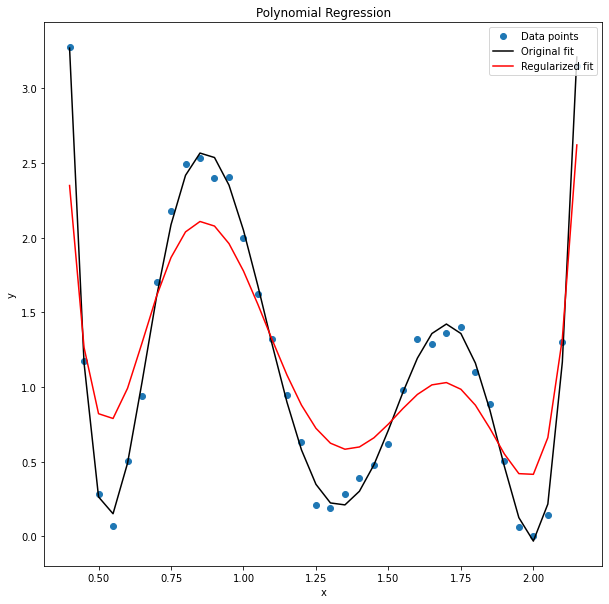

In [30]:
# plot results
plt.figure(figsize=(10, 10))
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')

y_pred = X @ theta
y_pred_reg = X @ theta_reg

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, y_pred, 'k-')
plt.plot(x_train, y_pred_reg, 'r-')
plt.legend(['Data points', 'Original fit', 'Regularized fit'], loc='upper right')

plt.show()